# Machine Learning Engineer Nanodegree

# Capstone: Predicting Loan Defaults In Peer-To-Peer Lending

## I. Getting Started
In this project, we will analyze a dataset containing data on potential borrowers. The goal of this project is to build a model predicting the loan default of potential borrowers. 

The dataset for this project can be found on [Lending Club](https://www.lendingclub.com/info/download-data.action).

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline
plt.style.use('fivethirtyeight')

# Load the accepted loan dataset 
# low_memory and skiprows in read_csv because the file is large and it leads to the Lending Club website
try:
    loan_data = pd.read_csv("LoanStats3a.csv", low_memory = False, skiprows = 1)
    print "The loan dataset has {} samples with {} features.".format(*loan_data.shape)
except:
    print "The loan dataset could not be loaded. Is the dataset missing?"

The loan dataset has 42538 samples with 111 features.


## II. Analysis

## Introduction To The Data

(explain the process of Lending club loan approval)

The dictionary data file is provided with the project in order to refer to it later in our data exploration. This contains information about the various columns and will be useful when we clean up the dataset. The data being used is the data from 2007 to 2011 mostly because when can be almost certain that all the loans have been either repaid or defaulted upon. Let's dive in.

In [2]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


As we can see, the number of columns will be something to work on. We will remove the *`desc`* and *`url`* columns mostly because it leads to or describes information that is not necessary for our analysis.  

In [3]:
loan_data = loan_data.drop(['desc', 'url'],axis=1)

Another notable thing to remove is to remove columns with more than 50% missing values. It would be time consumming and inefficient to deal with the tremendous amount of missing values from these columns.

In [5]:
# count half point of the dataset.
half_point = len(loan_data) / 2
loan_data = loan_data.dropna(thresh=half_point, axis=1)
# we save the new file
loan_data.to_csv('loan_data.csv', index=False)

We reload the data in the notebook and take a look at the first row.

In [6]:
loans_2007 = pd.read_csv('loan_data.csv', low_memory = False)
loans_2007.drop_duplicates()

loans_2007.iloc[0]

id                                1077501
member_id                      1.2966e+06
loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

In [7]:
loans_2007.shape[1]

52

As we have seen the Dataframe is cumbersome and we had to set the `low_memory` to `False` to avoid a warning message from the notebook. This is due to the numerous columns of the dataset. Let us now explore the dataset with the data dictionary as this will be useful as we go through the data and try to clean it.

One important thing to keep in mind is that we will need to be careful about data from the future, this type of leakage could throw off the predictions of our model. A clear example is information about the borrower after the loan was approved, this is not data that we would have at our disposal. 

We will be splitting the set in 4 columns giving us 13 features to analysis and try to make sense of. This part is crucial in order to understand the data and avoid error while fitting our machine learning model later on. 

### Analysis Of Columns Meaning and Usefulness
We will use the first entry of the `loan_data.csv` file to explore the meaning of the remaining 52 columns. 

In [8]:
first_entry = loan_data.iloc[0]
first_entry.to_csv('first_entry.csv', index = True)

In [9]:
description = pd.read_csv('LCDataDictionary.csv')

description.shape

(115, 2)

In [ ]:
import csv
list_first_entry = open('first_entry.csv', 'r')
first_csvreader = csv.reader(list_first_entry)
first_list = list(first_csvreader)

list_data_dictio = open('LCDataDictionary.csv', 'r')
second_csvreader = csv.reader(list_data_dictio)
second_list = list(second_csvreader)

table = []
for row in first_list:
    table.append(row[0])

new_table = []
for col in second_list:
    if col[0] in table:
        new_table.append(col)

In [ ]:
table

In [ ]:
new_table

### First Set Of Features
By analyzing the first 13 features, we understand that we can remove the *`id`* and *`member_id`* feature because it does not tell us anything about the person, these are arbitrary features given by Lending Club.

The *`funded_amnt`* and *`funded_amnt_inv`* are both features about the future the loan has been approved at that point and cannot be considered in our model. *`grade`* and *`sub_grade`* are recurring data  that we already have with (or a different angle on) the *`int_rate`* feature, thus we can dispose of them. 

Finally, although it could be an area of improvement in our model, the *`emp_title`* feature would be a hard feature to evaluate. Some form of sentiment analysis would need to be used and certain metrics would need to provide a good estimate of a title's meaning and value in the lending context. We will refrain ourselves in delving deeper, but we noticed this could be an interesting data science side project.  

In [10]:
#We drop the columns enumerated in the cell above.
loan_data = loan_data.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 
                              'grade', 'sub_grade', 'emp_title'], axis =1)

### Second Set Of Features
The next 13 features contain *`issue_d`*, this is data about the month the loan was funded, this means it leaks a future information, we need to remove it. The *`zip_code`* is a column that does not add any value because we already have the state adress with *`addr_state`*. The *`zip_code`* could be used with other economic data to uncover a relationship with the environnement in which a person lives and the risk of default, but this could be seen as discriminatory practice and we only have the first 3 digits of the code area.

In [11]:
loan_data = loan_data.drop(['issue_d','zip_code'], axis =1)

### Third Set Of Features
The following 5 variables are all about the future, they inform us about how the repayment is going, *`out_prncp`*, *`out_prncp_inv`*, *`total_pymnt`*, *`total_pymnt_inv`*, *`total_rec_prncp`*. We need to remove them from our model. The *`total_rec_int`* is about the interest received to date (meaning the loan has been approved) and *`total_rec_late_fee`* is about the interest that are late. These 2 variables need to be removed from the dataset.

In [12]:
loan_data = loan_data.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'], axis =1)

### Fourth Set Of Features
Finally, the last set of 13 features contain *`recoveries`* and *`collection_recovery_fee`* which are both leak from the future about the loan. And *`last_pymnt_d`* and *`last_pmyny_amnt`* are about the end of repayment, which means we cannot know that in advance.    

In [13]:
loan_data = loan_data.drop(['recoveries', 'collection_recovery_fee', 
                              'last_pymnt_d', 'last_pymnt_amnt'], axis =1)

In [16]:
print(loan_data.iloc[0])

loan_amnt                            5000
term                            36 months
int_rate                           10.65%
installment                        162.87
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                             0
earliest_cr_line                 Jan-1985
inq_last_6mths                          1
open_acc                                3
pub_rec                                 0
revol_bal                           13648
revol_util                          83.7%
total_acc                               9
initial_list_status                     f
last_credit_pull_d               D

Now the shape.

In [17]:
print(loan_data.shape[1])

32


We now have 32 columns to work with. We removed 20 columns of unuseful information and this will make the data easier to process and fit with the machine learning algorithm. But we are not done.

### Target Column
The target column is a critical part when fitting this type of data to machine learning algorithms because it tries to make prediction based on the outcome that we want. In this particular case, we want to predict the loan status (*`loan_status`*) which can take many values (9) in total. 

In [25]:
loan_data['loan_status'].value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

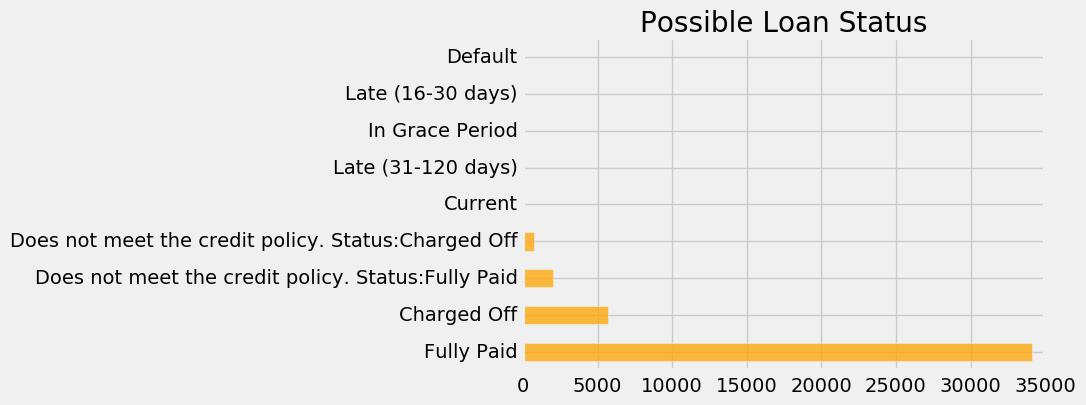

In [26]:
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)
plt.show()

We have 9 possibility for *`loan_status`* and only 2 values are important in our model's binary classification; fully paid and charged off. These 2 values indicate the result of the loan outcome. We will remove the other possibilities and avoid "translating" those values into the binary possibility (fully paid or charged off).

In [28]:
loan_data = loan_data[(loan_data['loan_status'] == "Fully Paid") | (loan_data['loan_status'] == "Charged Off")]

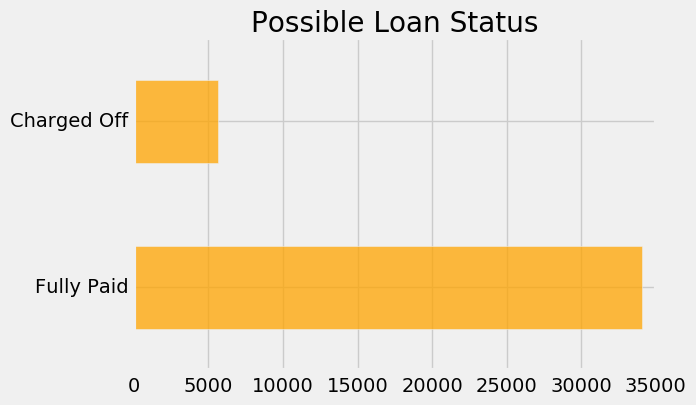

In [29]:
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)
plt.show()

We need to change the object value to numerical for the algorithm processing. Let's use a dictionary.

In [31]:
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}
loan_data = loan_data.replace(status_replace)

### Final Data Cleaning
Single value columns are not information that helps our model, it does not provide any insight into the likelihood of default or repayment, and will be removed from the dataset.

In [ ]:
orig_columns = loans_2007.columns
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans_2007 = loans_2007.drop(drop_columns, axis = 1)
print(drop_columns)

In [ ]:
loans_2007.shape

We were able to remove 9 columns and we are left with 23 features to work with. 

## III. Methodology

### Preparing The Features
We start with the filtered *loans_2007.csv* from the previous analysis. Do we have many Null values in the file loans_2007? We will look at how we can handle these values.  

In [ ]:
null_counts = loans_2007.isnull().sum()
print(null_counts)

We have 3 columns with missing values: 10 with *`title`*, 50 with *`revol_util`* and 697 with *`pub_rec_bankruptcies`* . Instead of removing the columns as we did earlier, we will remove the rows. We consider rows as incomplete (in a real life setting, we would reject the application simply because it is not complete).

In [ ]:
loans_2007 = loans_2007.drop("pub_rec_bankruptcies", axis=1)
loans_2007 = loans_2007.dropna(axis=0)

### Data Type
What about the types of columns?

In [ ]:
print(loans_2007.dtypes.value_counts())

We need to deal with the object data, because we cannot process it with scikit-learn, in order to use them in our model, we will need to convert them to numerical types. 

In [ ]:
object_columns_df = loans_2007.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

### Text Data To Categorical Data
Most of the text data can be adapted to be processed by the scikit-learn algorithms. 



(insert explanation)

In [ ]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for c in cols:
    print(loans_2007[c].value_counts())

The reason the loan was asked for: 

In [ ]:
print(loans_2007["purpose"].value_counts())

In [ ]:
print(loans_2007["title"].value_counts())

We need to encode categorical value with dummy variables. 

In [ ]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans_2007 = loans_2007.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loans_2007["int_rate"] = loans_2007["int_rate"].str.rstrip("%").astype("float")
loans_2007["revol_util"] = loans_2007["revol_util"].str.rstrip("%").astype("float")
loans_2007 = loans_2007.replace(mapping_dict)

Now, let's encode the previous variable.

In [ ]:
cat_columns = ["home_ownership", "verification_status", "emp_length", "purpose", "term"]
dummy_df = pd.get_dummies(loans_2007[cat_columns])
loans_2007 = pd.concat([loans_2007, dummy_df], axis=1)
loans_2007 = loans_2007.drop(cat_columns, axis=1)

## Machine Learning Algorithm Fitting
In this part, now that we have cleaned the dataset and encoded the variable with dummy encoding to process categorical data, let's dive in the first machine learning algorithm that we will try to use on the data set. But before, let's see the result of our work on the dataset.

In [ ]:
print(loans_2007.info())

### Evaluation Benchmark And Error Metrics
we talked about the need of a conservative evaluation of the default rate. We must also keep in mind that there is a strong imbalance with the target category of loan repayment in the dataset, because about 6 out of 7 loans are repaid. Meaning that we could lend money all the time (always predicting that the borrower would repay) and be right about 85.71% of the time that the loan would be repaid, but that would mean that the model would not be profitable. Say we lend \$1000 at 10% interest, we would expect a return of \$100 on each loan. But if we run the experiment 7 times, we would earn \$600 (6 x \$100) and lose \$1000 ( the defaulter ), we are left with a \$400 loss. Hardly a profitable enterprise. The benchmark needs to encompass the weight of the defaulter and the optimization between the true positive rate (good borrowers) and the false positive rate (bad borrowers). This implies that we need to ensure a viable machine learning model and predict a higher percentage of potential defaulters in order to avoid lending to them. The benchmark must beat the 85.71% average loan repayment. Although “money is left on the table”, a conservative investor would prefer a steady return on her investment than suffer the 1 in 7 loss. 

The best metrics to evaluate our algorithm are the recall (true positive rate), the precision and the F1 score (a measure of the relation between the two previous metrics). We will achieve this by training our model on the training dataset and than trying to predict – based on the columns value – the good customers of the testing set. We can than measure if this is practical and realistic. Otherwise, error metric balancing will be handy in recalibrating the model because we know that there is an imbalance between the repaid loans and defaulted loan. The recall and precision are good metrics for measuring an imbalanced distribution of data points.

(talk about true positive, ect.) We can find the false negative (and so on), by automating their classification with a simple script (only using numpy). We do this simply to have a general idea of the imbalance with the loans outcome. 

In [ ]:
# Predict that all loans will be paid off on time.
predictions = pd.Series(numpy.ones(loans_2007.shape[0]))

fp_filter = (predictions == 1) & (loans_2007['loan_status'] == 0)
fp = len(predictions[fp_filter])

tp_filter = (predictions == 1) & (loans_2007['loan_status'] == 1)
tp = len(predictions[tp_filter])

fn_filter = (predictions == 0) & (loans_2007['loan_status'] == 1)
fn = len(predictions[fn_filter])

tn_filter = (predictions == 0) & (loans_2007['loan_status'] == 0)
tn = len(predictions[tn_filter])

tpr = tp / (tp + fn)
fpr = fp / (fp +tn)

print float(tpr) 
print float(fpr)

### Random Forest
Let's fire up scikit-learn by trying out the random forest classifier on the dataset. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression

cross_val_predict, KFold
penalty = {0: 10,
    1: 1
}

lr = RandomForestClassifier(random_state = 1, class_weight = 'balanced')
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(lr, features, target, cv= kf)
predictions = pd.Series(predictions)

fp_filter = (predictions == 1) & (loans_2007['loan_status'] == 0)
fp = len(predictions[fp_filter])

tp_filter = (predictions == 1) & (loans_2007['loan_status'] == 1)
tp = len(predictions[tp_filter])

fn_filter = (predictions == 0) & (loans_2007['loan_status'] == 1)
fn = len(predictions[fn_filter])

tn_filter = (predictions == 0) & (loans_2007['loan_status'] == 0)
tn = len(predictions[tn_filter])

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)